***Mounting the drive***

---



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


***Loading all required libraries.***

---


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import *
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
from sklearn.utils import shuffle

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cv2

import os

*Combining all the image paths and mask paths into single path*

---



In [5]:
image_path1='/content/gdrive/MyDrive/data/from_hot/1/'
image_path2='/content/gdrive/MyDrive/data/from_hot/2/'
image_path3='/content/gdrive/MyDrive/data/from_hot/3/'
image_path4='/content/gdrive/MyDrive/data/from_hot/4/'
image_path5='/content/gdrive/MyDrive/data/from_hot/5/'
all_image_paths = [[image_path1+file for file in os.listdir(image_path1)]+[image_path2+file for file in os.listdir(image_path2)]+[image_path3+file for file in os.listdir(image_path3)]+[image_path4+file for file in os.listdir(image_path4)]+[image_path5+file for file in os.listdir(image_path5)]][0]

In [6]:
label_path1='/content/gdrive/MyDrive/data/rasterized_labels/1/'
label_path2='/content/gdrive/MyDrive/data/rasterized_labels/2/'
label_path3='/content/gdrive/MyDrive/data/rasterized_labels/3/'
label_path4='/content/gdrive/MyDrive/data/rasterized_labels/4/'
label_path5='/content/gdrive/MyDrive/data/rasterized_labels/5/'

all_masks_paths=[[label_path1+file for file in os.listdir(label_path1)]+[label_path2+file for file in os.listdir(label_path2)]+[label_path3+file for file in os.listdir(label_path3)]+[label_path4+file for file in os.listdir(label_path4)]+[label_path5+file for file in os.listdir(label_path5)]][0]

***Removing Json files and appending only images ending with .png***

---



In [7]:
all_images_paths=[]
for images in all_image_paths:
  if(images.endswith('.png')):
    all_images_paths.append(images)

In [8]:
len(all_images_paths)

162

***Sorting all the image paths and mask paths so as to get corresponding matching image and mask files*** 

---



In [9]:
all_images_paths=sorted(all_images_paths)

In [10]:
all_masks_paths=sorted(all_masks_paths)

In [11]:
all_images_paths[0:5]

['/content/gdrive/MyDrive/data/from_hot/1/OAM-319305-270982-19.png',
 '/content/gdrive/MyDrive/data/from_hot/1/OAM-319305-270983-19.png',
 '/content/gdrive/MyDrive/data/from_hot/1/OAM-319305-270984-19.png',
 '/content/gdrive/MyDrive/data/from_hot/1/OAM-319305-270985-19.png',
 '/content/gdrive/MyDrive/data/from_hot/1/OAM-319306-270982-19.png']

In [12]:
all_masks_paths[0:5]

['/content/gdrive/MyDrive/data/rasterized_labels/1/OAM-319305-270982-19-label.png',
 '/content/gdrive/MyDrive/data/rasterized_labels/1/OAM-319305-270983-19-label.png',
 '/content/gdrive/MyDrive/data/rasterized_labels/1/OAM-319305-270984-19-label.png',
 '/content/gdrive/MyDrive/data/rasterized_labels/1/OAM-319305-270985-19-label.png',
 '/content/gdrive/MyDrive/data/rasterized_labels/1/OAM-319306-270982-19-label.png']

***Getting the corresponding numpy array from the Images/Masks***

---



In [13]:
IMAGE_SIZE = 256

def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = np.mean(image, axis=-1)/255.0
        images.append(image)
    return np.array(images)

# ***Data Visualization***

---



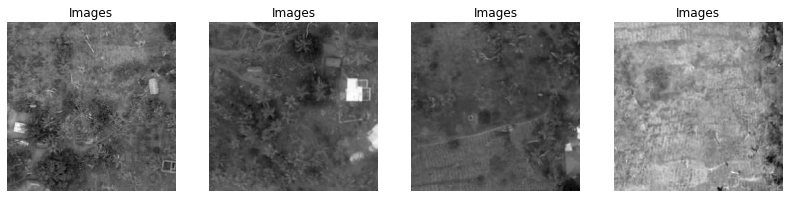

In [14]:
fig = plt.figure(figsize=(32, 32))
for i in range(1,5):
  fig.add_subplot(3,9,i)
  plt.axis('off')
  plt.title('Images')
  plt.imshow(open_images([all_images_paths[i-1]])[0], cmap='gray')
plt.show()

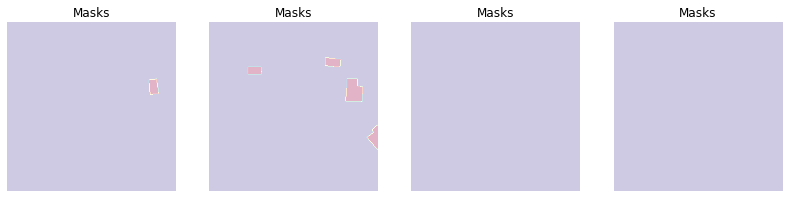

In [15]:
fig = plt.figure(figsize=(32, 32))
for i in range(1,5):
  fig.add_subplot(3,9,i)
  plt.axis('off')
  plt.title('Masks')
  plt.imshow(open_images([all_masks_paths[i-1]])[0], cmap='Spectral_r', alpha=0.3)
plt.show()

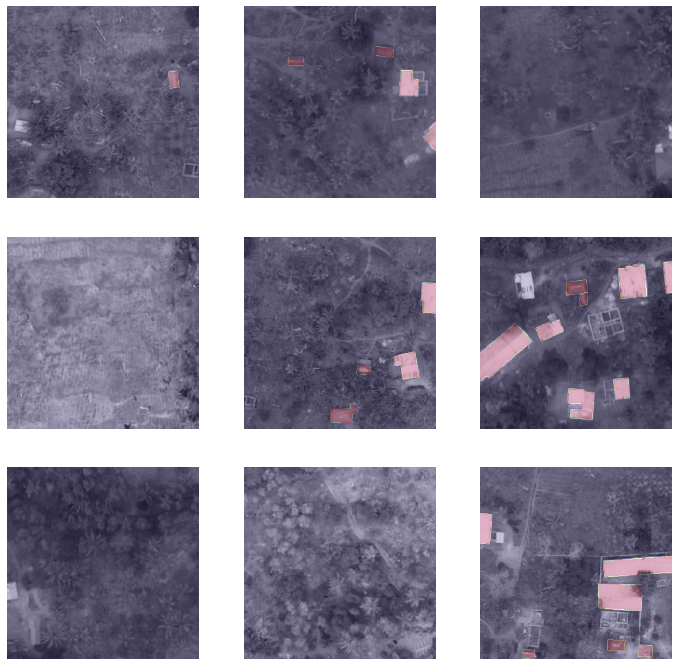

In [16]:
fig = plt.figure(figsize=(12, 12))
c = 3
r = 3
for i in range(1, c*r +1):
    fig.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(open_images([all_images_paths[i-1]])[0], cmap='gray')
    plt.imshow(open_images([all_masks_paths[i-1]])[0], cmap='Spectral_r', alpha=0.3)
plt.show()

# ***Data Augmentation***

In [1]:
import albumentations as A
import cv2

transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
])

In [49]:
all_images=open_images(all_images_paths)
all_masks=open_images(all_masks_paths)

In [18]:
transformed_images=[]
transformed_masks=[]
i=0
for i in range (len(all_images)):
  image=all_images[i]
  mask=all_masks[i]
  transformed = transform(image=image, mask=mask)
  transformed_images.append(transformed['image'])
  transformed_masks.append(transformed['mask'])
  # np.append(all_images,((transformed['image'])))
  # np.append(all_masks,((transformed['mask'])))

In [50]:
len(all_images)

162

In [51]:
all_images=list(all_images)
for image in transformed_images:
  all_images.append(image)
len(all_images)

324

In [52]:
all_masks=list(all_masks)
for mask in transformed_masks:
  all_masks.append(mask)
len(all_masks)

324

In [78]:
all_images=np.array(all_images)
all_masks=np.array(all_masks)

In [79]:
all_images.shape

(324, 256, 256)

In [80]:
all_masks.shape

(324, 256, 256)

# ***Data split into Train and Validation***

---



In [143]:
train_images = all_images[:270]
train_masks = all_masks[:270]
val_images = all_images[270:]
val_masks = all_masks[270:]

def datagen(train_img, mask_img, batch_size):
    for x in range(0, len(train_img), batch_size):
        images = train_img[x:x+batch_size].reshape(-1,IMAGE_SIZE, IMAGE_SIZE, 1)
        masks = mask_img[x:x+batch_size].reshape(-1,IMAGE_SIZE, IMAGE_SIZE, 1)
        yield images, masks

In [146]:
train_images.shape

(270, 256, 256)

In [92]:
train_masks.shape

(270, 256, 256)

In [91]:
val_images.shape

(54, 256, 256)

In [93]:
val_masks.shape

(54, 256, 256)

# ***Model Building***

---



In [54]:
img_input = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x1 = Conv2D(64, (3,3), activation='relu', padding='same')(img_input)
x1 = Conv2D(64, (3,3), activation='relu', padding='same')(x1)
x1_pool = MaxPool2D((2,2))(x1)

x2 = Conv2D(128, (3,3), activation='relu', padding='same')(x1_pool)
x2 = Conv2D(128, (3,3), activation='relu', padding='same')(x2)
x2_pool = MaxPool2D((2,2))(x2)

x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x2_pool)
x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x3_pool = MaxPool2D((2,2))(x3)

x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3_pool)
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x4)
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x4)
x4_pool = UpSampling2D((2,2))(x4)

x5 = Concatenate()([x4_pool, x3])
x5 = Conv2D(128, (3,3), activation='relu', padding='same')(x5)
x5 = Conv2D(128, (3,3), activation='relu', padding='same')(x5)
x5_pool = UpSampling2D((2,2))(x5)

x6 = Concatenate()([x5_pool, x2])
x6 = Conv2D(64, (3,3), activation='relu', padding='same')(x6)
x6 = Conv2D(64, (3,3), activation='relu', padding='same')(x6)
x6_pool = UpSampling2D((2,2))(x6)

x7 = Concatenate()([x6_pool, x1])
x7 = Conv2D(64, (3,3), activation='relu', padding='same')(x7)
x7 = Conv2D(64, (3,3), activation='relu', padding='same')(x7)
x7 = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x7)

model = Model(img_input, x7)

In [155]:
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=[iou_coef,"accuracy"])

# ***Model Fitting***

---


In [158]:
batch_size = 1
steps = 1
epochs = 1
for _ in range(epochs):
   model.fit(datagen(train_images,train_masks,batch_size), epochs=1, steps_per_epoch=steps)

1/1 [==============================] - 0s 71ms/step - loss: 0.1024 - iou_coef: 0.0118 - accuracy: 0.9957


# *Model Evaluation*

---



In [160]:
batch_size = 1
steps = 1
model.evaluate(datagen(val_images, val_masks, batch_size=batch_size), steps=steps)

1/1 [==============================] - 0s 45ms/step - loss: 0.1638 - iou_coef: 0.0536 - accuracy: 0.9584


[0.16377927362918854, 0.05355272814631462, 0.95843505859375]